<a href="https://colab.research.google.com/github/naufalhisyam/TurbidityPrediction-thesis/blob/main/LBP_from_DNG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rawpy

     |████████████████████████████████| 2.2 MB 5.3 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os

path = "/content/gdrive/MyDrive/tes_citra"

In [4]:
import cv2
import rawpy
import numpy as np
from matplotlib import pyplot as plt
   
      
def get_pixel(img, center, x, y):
      
    new_value = 0
      
    try:
        # If local neighbourhood pixel 
        # value is greater than or equal
        # to center pixel values then 
        # set it to 1
        if img[x][y] >= center:
            new_value = 1
              
    except:
        # Exception is required when 
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
      
    return new_value
   
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
      
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val


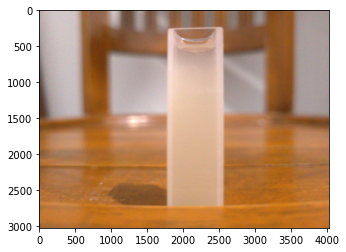

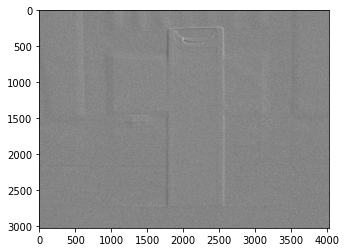

LBP Program is finished


In [11]:
name = 'uncontrolled'
path = '/content/gdrive/MyDrive/tes_citra/uncontrolled.dng'
raw = rawpy.imread(path)
rgb = raw.postprocess()
img_bgr = rgb
   
height, width, _ = img_bgr.shape
   
# We need to convert RGB image 
# into gray one because gray 
# image has one channel only.
img_gray = cv2.cvtColor(img_bgr,
                        cv2.COLOR_BGR2GRAY)
   
# Create a numpy array as 
# the same height and width 
# of RGB image
img_lbp = np.zeros((height, width),
                   np.uint8)
   
for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  
plt.imshow(img_bgr)
plt.show()
   
plt.imshow(img_lbp, cmap ="gray")
plt.show()

os.makedirs("/content/gdrive/MyDrive/tes_citra/hasil", exist_ok=True)
os.makedirs("/content/hasil", exist_ok=True)
cv2.imwrite(f'/content/hasil/{name}_lbp.jpg', img_lbp)
!cp -a "/content/hasil/." "/content/gdrive/MyDrive/tes_citra/hasil"
   
print("LBP Program is finished")